In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


dataset = "sepsis"


path_evo_V = "global_result_V.csv" 
path_evo_w = "global_result_w.csv" 
path_no_evo = "no_evoruns_results_0.csv"

base_path = "./" + dataset + "/"

results_evo_V = pd.read_csv(base_path + path_evo_V)
results_evo_w = pd.read_csv(base_path + path_evo_w)
results_no_evo = pd.read_csv(base_path + path_no_evo)


In [2]:
#Preprocessing data (nel main_evol_ind.py ci siamo dimenticati di mettere update_gene)
results_evo_V["update_gene"] = "V"
results_evo_w["update_gene"] = "neuron_weights"

all_evo_results = pd.concat([results_evo_V, results_evo_w])

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_10230/3037994840.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure1.show()


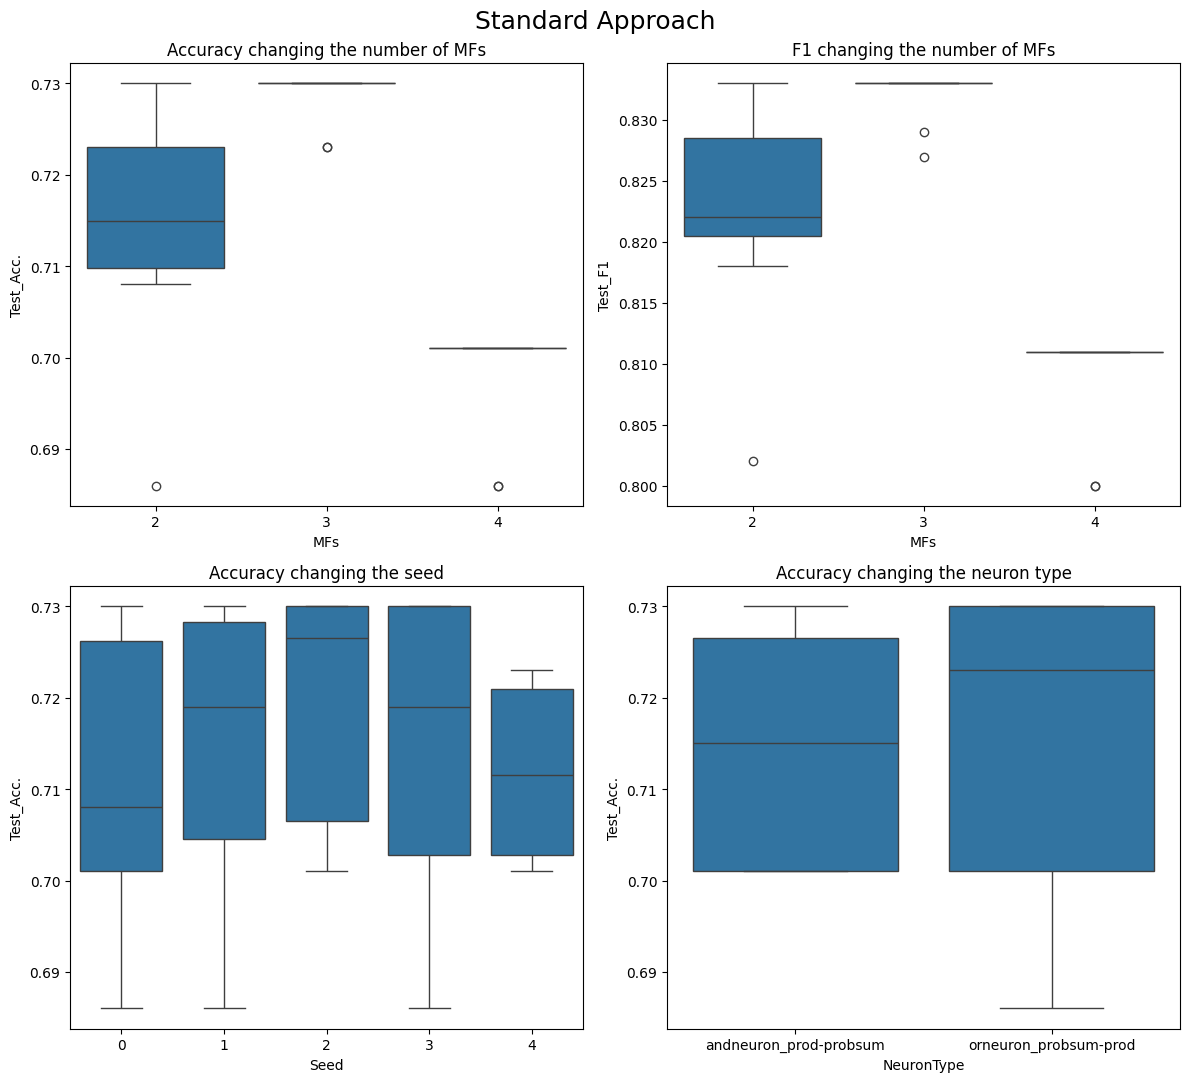

In [3]:
#Standard Approach
figure1, axs1 = plt.subplots(2, 2, figsize=(12, 11))
figure1.suptitle("Standard Approach", fontsize=18)

sns.boxplot(x="MFs", y="Test_Acc.", data=results_no_evo, ax=axs1[0, 0])
axs1[0,0].set_title("Accuracy changing the number of MFs")

sns.boxplot(x="MFs", y="Test_F1", data=results_no_evo, ax=axs1[0, 1])
axs1[0,1].set_title("F1 changing the number of MFs")


sns.boxplot(x="Seed", y="Test_Acc.", data=results_no_evo, ax=axs1[1, 0])
axs1[1,0].set_title("Accuracy changing the seed")

sns.boxplot(x="NeuronType", y="Test_Acc.", data=results_no_evo, ax=axs1[1, 1])
axs1[1,1].set_title("Accuracy changing the neuron type")

figure1.tight_layout()
figure1.show()

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_10230/3887573394.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure2.show()


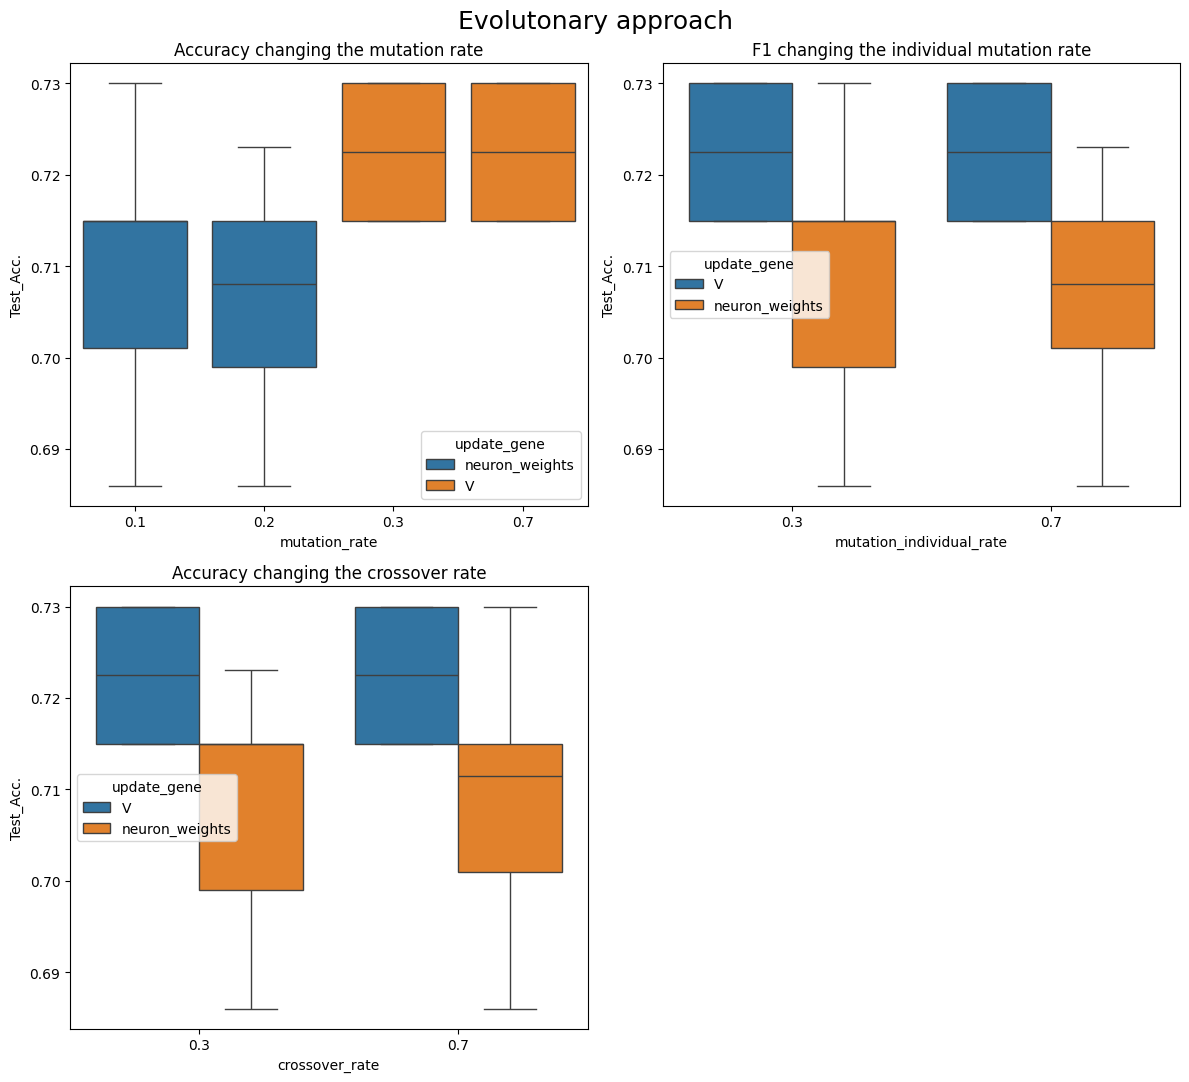

In [4]:

#Evolutionary approach
figure2, axs2 = plt.subplots(2, 2, figsize=(12, 11))
figure2.suptitle("Evolutonary approach", fontsize=18)

sns.boxplot(x="mutation_rate", y="Test_Acc.", data=all_evo_results, hue="update_gene", ax=axs2[0, 0])
axs2[0,0].set_title("Accuracy changing the mutation rate")

sns.boxplot(x="mutation_individual_rate", y="Test_Acc.", data=all_evo_results, hue="update_gene", ax=axs2[0, 1])
axs2[0,1].set_title("F1 changing the individual mutation rate")


sns.boxplot(x="crossover_rate", y="Test_Acc.", data=all_evo_results, hue="update_gene", ax=axs2[1, 0])
axs2[1,0].set_title("Accuracy changing the crossover rate")

axs2[1,1].axis('off')


figure2.tight_layout()
figure2.show()

In [5]:
#Preparing the data for the comparison


#Adding the type of the approach
results_evo_V["type"] = "evo_V"
results_evo_w["type"] = "evo_w"
results_no_evo["type"] = "no_evo"

all_results = pd.concat([results_evo_V, results_evo_w, results_no_evo])

#Take the best result for each approach
best_result_globally_evo_v = pd.DataFrame({"Test_Acc.": [results_evo_V["Test_Acc."].max(0)],"type": "evo_V"})
best_result_globally_evo_w = pd.DataFrame({"Test_Acc.": [results_evo_w["Test_Acc."].max(0)],"type": "evo_w"})
best_result_globally_no_evo = pd.DataFrame({"Test_Acc.": [results_no_evo["Test_Acc."].max(0)],"type": "no_evo"})

best_results = pd.concat([best_result_globally_evo_v, best_result_globally_evo_w, best_result_globally_no_evo])


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_10230/1696596125.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure1.show()


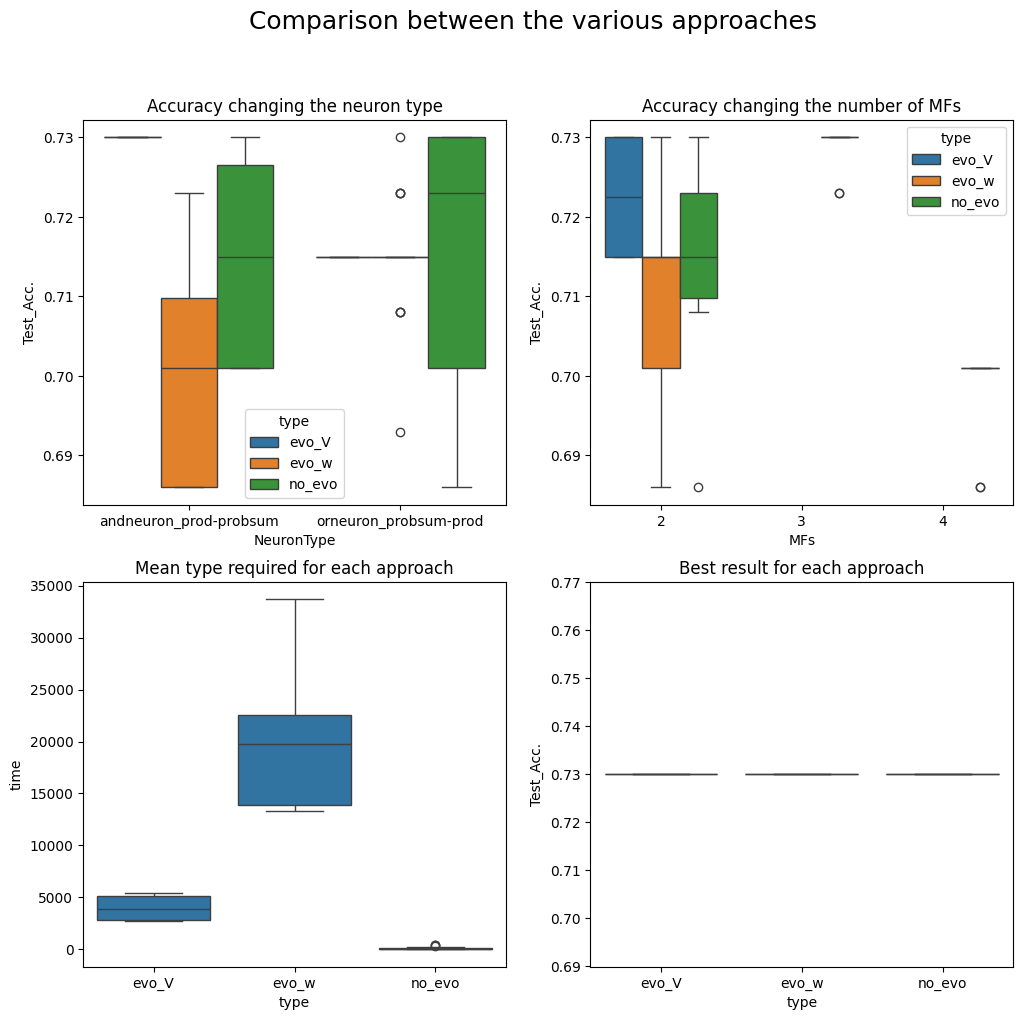

In [6]:

#Comparison of the approaches
#Evolutionary approach
figure3, axs3 = plt.subplots(2, 2, figsize=(12, 11))
figure3.suptitle("Comparison between the various approaches", fontsize=18)

sns.boxplot(x="NeuronType", y="Test_Acc.", data=all_results, hue="type", ax=axs3[0, 0])
axs3[0,0].set_title("Accuracy changing the neuron type")

sns.boxplot(x="MFs", y="Test_Acc.", data=all_results, hue="type", ax=axs3[0, 1])
axs3[0,1].set_title("Accuracy changing the number of MFs")


sns.boxplot(x="type", y="time", data=all_results, ax=axs3[1, 0])
axs3[1,0].set_title("Mean type required for each approach")

sns.boxplot(x="type", y="Test_Acc.", data=best_results, ax=axs3[1, 1])
axs3[1,1].set_title("Best result for each approach")


figure1.tight_layout()
figure1.show()